# Flight Data Analyzer Showcase

Welcome to our Flight Data Analyzer Showcase! In this notebook, we demonstrate the capabilities of the `FlightDataAnalyzer` class, designed to simplify the analysis and visualization of aviation data. This class automates the process of downloading and analyzing flight data, airport information, airplane specifications, and flight routes.

Our goal is to provide an insightful look into the aviation industry's dynamics through data-driven analysis. We will explore various functionalities, including distance calculations between airports, visualization of airport locations and flight routes, analysis of the most used airplane models, and more.

By the end of this notebook, you will have a comprehensive understanding of how the `FlightDataAnalyzer` can be leveraged to extract meaningful insights from aviation data, potentially aiding in research, logistics planning, and trend analysis within the aviation sector.


## Setup

In this section, we'll prepare our environment by importing necessary Python libraries and initializing the `FlightDataAnalyzer` class.

Please confirm that you have the downloaded the adpro.py file, which contains the class.

Upon initializing the `FlightDataAnalyzer` class, it automatically downloads the necessary datasets for flight analysis, including flights data, airports data, airplanes data, and routes data. This automation streamlines the setup process, ensuring all relevant data is readily available for analysis. Let's confirm the presence of these datasets in the specified download directory.


In [1]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import geopandas as gpd  

from adpro import FlightDataAnalyzer

analyzer = FlightDataAnalyzer()

print("Setup complete. Ready to analyze flight data!")


airlines.csv already exists.
airports.csv already exists.
airplanes.csv already exists.
routes.csv already exists.
Setup complete. Ready to analyze flight data!


## Data Exploration

With the datasets successfully downloaded and loaded into pandas DataFrames, let's take a moment to explore this data. We'll display the first few rows of each dataset to get a sense of the information available to us. This preliminary exploration is crucial for understanding the datasets' structure and guiding our subsequent analysis.

In [2]:
print("Flights Data:")
analyzer.flights_df.head()

Flights Data:


index  Airline ID                                          Name Alias IATA  \
0      0          -1                                       Unknown    \N    -   
1      1           1                                Private flight    \N    -   
2      2           2                                   135 Airways    \N  NaN   
3      3           3                                 1Time Airline    \N   1T   
4      4           4  2 Sqn No 1 Elementary Flying Training School    \N  NaN   

  ICAO Callsign         Country Active  
0  NaN       \N              \N      Y  
1  NaN      NaN             NaN      Y  
2  GNL  GENERAL   United States      N  
3  RNX  NEXTIME    South Africa      Y  
4  WYT      NaN  United Kingdom      N

In [3]:
print("\nAirplanes Data:")
analyzer.airplanes_df.head()


Airplanes Data:


index                                          Name IATA code ICAO code
0      0                       Aerospatiale (Nord) 262       ND2      N262
1      1  Aerospatiale (Sud Aviation) Se.210 Caravelle       CRV      S210
2      2                  Aerospatiale SN.601 Corvette       NDC      S601
3      3                Aerospatiale/Alenia ATR 42-300       AT4      AT43
4      4                Aerospatiale/Alenia ATR 42-500       AT5      AT45

In [4]:
print("\nRoutes Data:")
analyzer.routes_df.head()


Routes Data:


index Airline Airline ID Source airport Source airport ID  \
0      0      2B        410            AER              2965   
1      1      2B        410            ASF              2966   
2      2      2B        410            ASF              2966   
3      3      2B        410            CEK              2968   
4      4      2B        410            CEK              2968   

  Destination airport Destination airport ID Codeshare  Stops Equipment  
0                 KZN                   2990       NaN      0       CR2  
1                 KZN                   2990       NaN      0       CR2  
2                 MRV                   2962       NaN      0       CR2  
3                 KZN                   2990       NaN      0       CR2  
4                 OVB                   4078       NaN      0       CR2

In [5]:
print("\nAirports Data:")
analyzer.airports_df.head()


Airports Data:


index  Airport ID                                         Name  \
0      0           1                               Goroka Airport   
1      1           2                               Madang Airport   
2      2           3                 Mount Hagen Kagamuga Airport   
3      3           4                               Nadzab Airport   
4      4           5  Port Moresby Jacksons International Airport   

           City           Country IATA  ICAO  Latitude   Longitude  Altitude  \
0        Goroka  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282   
1        Madang  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20   
2   Mount Hagen  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388   
3        Nadzab  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239   
4  Port Moresby  Papua New Guinea  POM  AYPY -9.443380  147.220001       146   

  Timezone DST Tz database time zone     Type       Source  
0       10   U  Pacific/Port_Moresby  airport  OurAirports  
1       10   U  Pacific/Port_Moresby  airport  OurAirports  
2       10   U  Pacific/Port_Moresby  airport  OurAirports  
3       10   U  Pacific/Port_Moresby  airport  OurAirports  
4       10   U  Pacific/Port_Moresby  airport  OurAirports

## Distance Calculations with Airport Names

The `FlightDataAnalyzer` class includes a functionality for calculating distances between airports based on their names. This feature is useful for various applications, including travel planning and flight logistics analysis. Below are three demonstrations using six different airports to showcase this capability.

To use this functionality, the user must call the calculate_distance_by_airport method, and pass two airport names as inp


In [6]:
# Los Angeles International Airport to Singapore Changi Airport
distance_la_sg = analyzer.calculate_distance_by_airport("Los Angeles International Airport", "Singapore Changi Airport")
print(f"Distance between Los Angeles International Airport and Singapore Changi Airport: {distance_la_sg} km\n")

# Distance between the airports with the lowest altitude - Bar Yehuda Airfield and Ein Yahav Airfield
distance_low_alt = analyzer.calculate_distance_by_airport("Bar Yehuda Airfield", "Ein Yahav Airfield")
print(f"Distance between the airports with the lowest altitude: {distance_low_alt} km\n")

# Distance between Humberto Delgado Airport (Lisbon Portela Airport) and Adolfo Suárez Madrid–Barajas Airport

distance_lis_mad = analyzer.calculate_distance_by_airport("Humberto Delgado Airport (Lisbon Portela Airport)", "Adolfo Suárez Madrid–Barajas Airport")
print(f"Distance between Humberto Delgado Airport (Lisbon Portela Airport) and Adolfo Suárez Madrid–Barajas Airport: {distance_lis_mad} km")

Distance between Los Angeles International Airport and Singapore Changi Airport: 14101.51724743739 km

Distance between the airports with the lowest altitude: 80.52088445670901 km

Distance between Humberto Delgado Airport (Lisbon Portela Airport) and Adolfo Suárez Madrid–Barajas Airport: 512.8839403664687 km


This class also returns an error message if one or both airport names passed as arguments do not exist in the dataset

In [7]:
err_eg = analyzer.calculate_distance_by_airport('NOVA SBE', 'Humberto Delgado Airport (Lisbon Portela Airport)')
print(err_eg)

One or both airports not found: NOVA SBE, Humberto Delgado Airport (Lisbon Portela Airport)
None


# Visualization Demonstrations Overview

In this section, we will explore various visualization capabilities of the `FlightDataAnalyzer` class. Through interactive and informative visualizations, we aim to uncover patterns and insights from the aviation data. Each method serves a unique analytical purpose, enhancing our understanding of different aspects of air travel.

## 1. Plot Airports by Country

This method visualizes the geographical distribution of airports within a specified country. By plotting airports on a map, we gain insights into regional connectivity, airport density, and the infrastructure supporting air travel within the country.

This method takes the country name as an argument.

C:\Users\migue\Documents\adpro\group_24\adpro.py:193: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


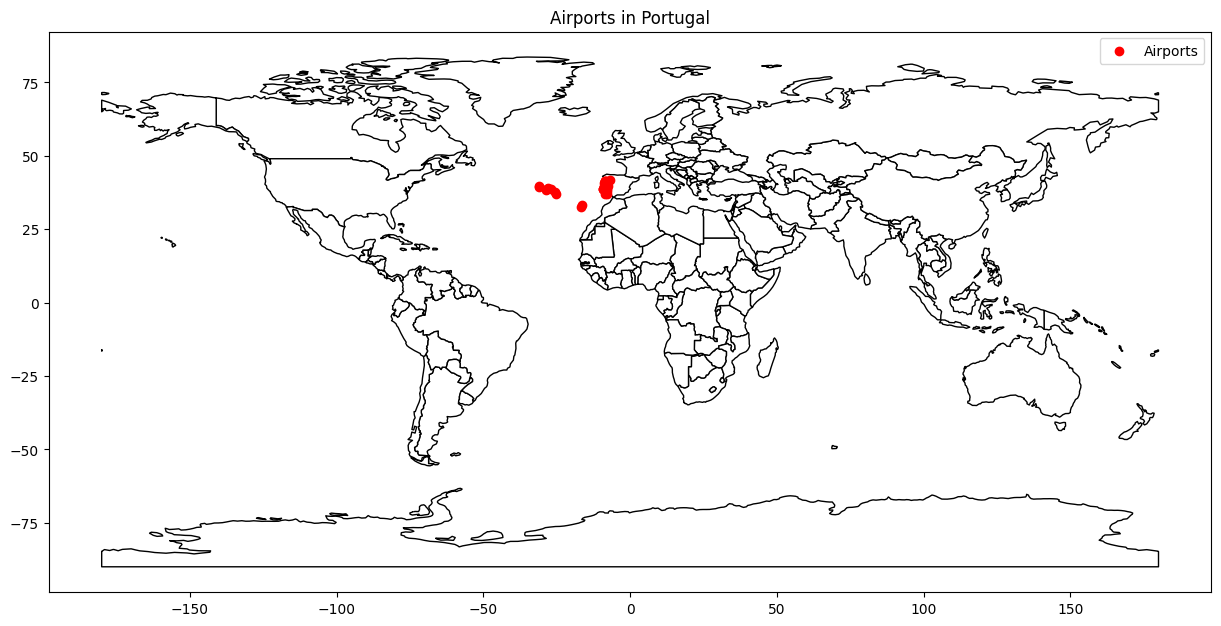

In [8]:
analyzer.plot_airport_in_country('Portugal')

## 2. Plot Flights from an Airport

Focusing on a single airport, this visualization method plots all outgoing flights to demonstrate the airport's connectivity. It reveals the range of direct destinations, highlighting the airport's role in the global air transport network.

Please note that this method takes two arguments. The first, airport_code, refers to the IATA airport code of the chosen airport.
The second argument, internal, specifies if you want to visualize routes inside the country or outside the country. This argument should be passed as boolean.

C:\Users\migue\Documents\adpro\group_24\adpro.py:311: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


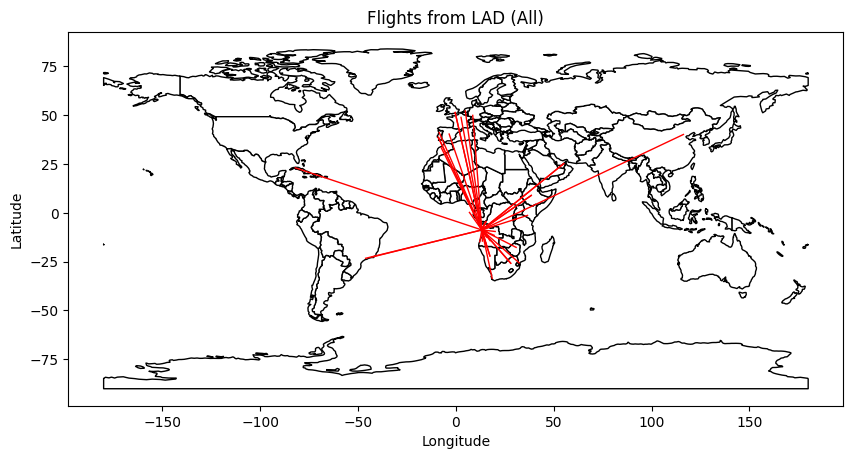

In [9]:
# Flights from Quatro de Fevereiro Airport to international airports
analyzer.plot_flights_from_airport('LAD', False) 

C:\Users\migue\Documents\adpro\group_24\adpro.py:311: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


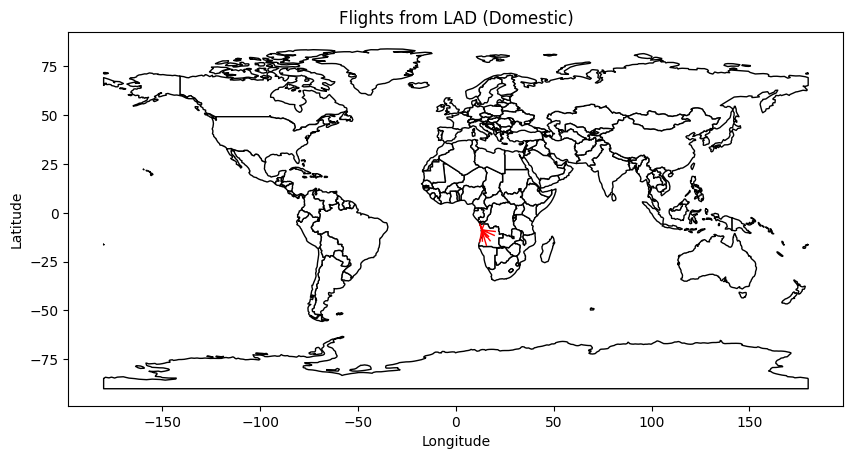

In [10]:
# Fights from Quatro de Fevereiro Airport to national airports

analyzer.plot_flights_from_airport('LAD', True) 

### Error warning: If the bars on the chart don't appear please re-run the cell below after running the whole notebook

## 3. Plot Flights from a Country

By visualizing all flights originating from a specific country, this method distinguishes between domestic and international routes. It illustrates the country's global connectivity and its significance within the international aviation landscape.

This method takes two arguments. The first, country_name, takes the country name. 
The second, internal, specifies if the user wants to visualize the flights within the country or the international flights. This argument should be specified as a boolean.

C:\Users\migue\Documents\adpro\group_24\adpro.py:417: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


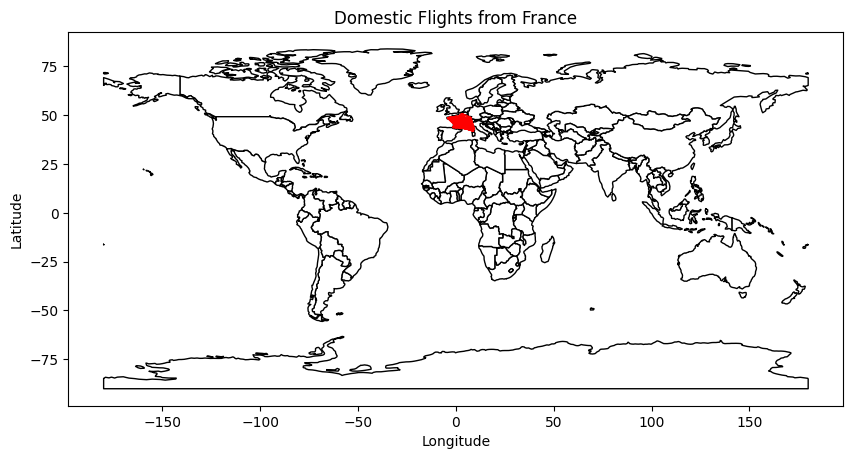

In [11]:
analyzer.plot_flights_from_country("France", internal = True)

C:\Users\migue\Documents\adpro\group_24\adpro.py:417: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


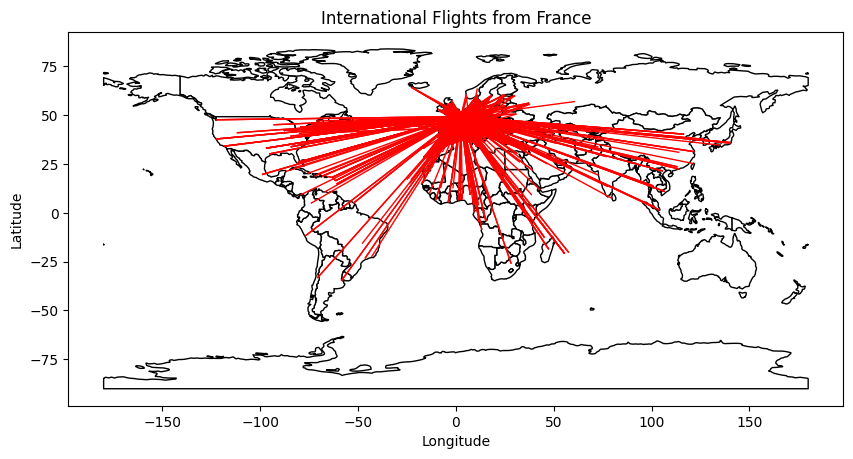

In [12]:
analyzer.plot_flights_from_country("France", internal = False)

## 4. Plot Most Used Airplane Models

This method aggregates and visualizes data on the most frequently used airplane models in the dataset. The resulting visualization can shed light on aircraft preferences among airlines, influenced by factors such as efficiency, capacity, and operational requirements.

This method takes top_n as an argument to display the top n most used airplane models worldwide.

Please note that due to some data related issues, some aircrafts do not have a name in the dataset and this could lead to missing columns in the histogram.

For instance, the top 20 only displays 14 airplane models due to missing airplane models names.

#### Warning: If the bar chart appears empty please rerun the cell after running the entire notebook.

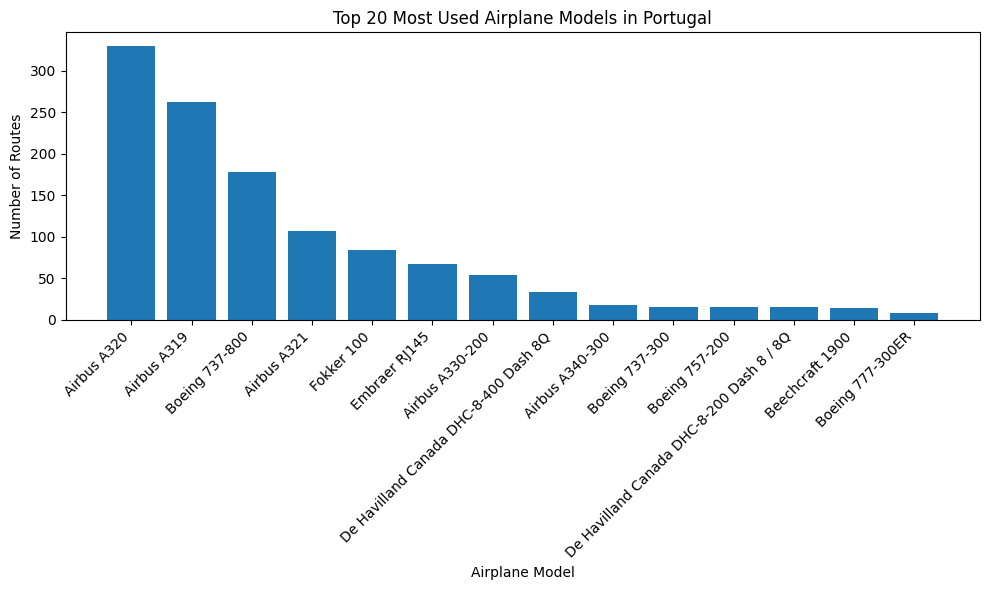

In [18]:
analyzer.plot_most_used_airplane_models(countries = 'Portugal', top_n = 20)

## 5. Flight distance distribution

The histogram bellow illustrates the distribution of flight distances based on the available flight data. A few key observations can be made:

- **Short-Haul Flights:** There is a significant concentration of flights within the shorter distance range, up to 2,000 km. This likely reflects the high volume of domestic and regional flights, which are common in the aviation industry.

- **Long-Haul Flights:** While the number of long-haul flights (distances greater than 5,000 km) is relatively lower, they represent essential connections between major international hubs.

- **Skewness:** The histogram shows a right-skewed distribution, indicating that a large number of flights cover shorter distances. This is typical for air travel, as there are generally more short-haul flights than long-haul flights.

- **Most Common Flight Distances:** The majority of flights fall within the first bin of the histogram, which suggests that the most common flight distances are relatively short. This could reflect the high frequency of regional or domestic flights within a country or continent.

- **Very Long Distances Are Rare:** The histogram also shows that flights covering very long distances (for example, those over 10,000 km) are quite rare. This is expected, as there are only a limited number of city pairs that require such long distances to be covered and operational constraints on aircraft range.

This distribution is a fundamental characteristic of air travel patterns and has implications for airline operations, and airport planning in aviation.



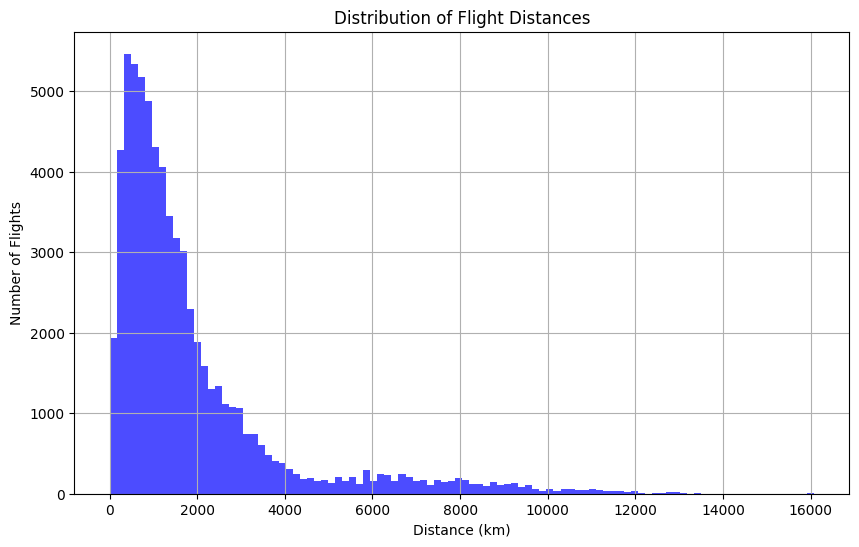

In [14]:
analyzer.distance_analysis()

## 6. Fetch Aircraft Model Specifications

This method retrieves and displays a detailed specification table for a specified aircraft model using an advanced Language Learning Model (LLM). It accepts `aircraft_name` as an argument to identify the aircraft model whose specifications are to be fetched. If the specified model is not recognized, it raises an exception with guidance for correction.

To facilitate this process, the method requires a valid API key, set as an environment variable, to authenticate the request to the LLM API. Upon a successful API call, it prints a markdown-formatted table of the aircraft's specifications, including dimensions, performance metrics, and other relevant details. In case of failure, due to API issues or missing API keys, it provides clear error messages to assist with troubleshooting.

This functionality is essential for quickly accessing precise aircraft details, useful for aviation enthusiasts, researchers, and industry professionals directly from their notebooks.


In [15]:
analyzer.aircraft_info("Airbus A318")

| **Aspect**            | **Specification**                                          |
|-----------------------|------------------------------------------------------------|
| **Manufacturer**      | Airbus                                                     |
| **Model**             | A318                                                       |
| **Cockpit Crew**      | 2 (Pilot & Co-Pilot)                                       |
| **Seating Capacity**  | Up to 132 passengers in a single-class configuration        |
| **Length**            | 31.44 meters (102 ft 10 in)                                 |
| **Wingspan**          | 34.10 meters (111 ft 10 in)                                 |
| **Height**            | 12.56 meters (41 ft 2 in)                                   |
| **Maximum Takeoff Weight** | 68,000 kg (150,000 lb)                                   |
| **Maximum Range**     | 5,700 kilometers (3,075 nautical miles)                    |
| **Cruising Speed**    | Mach 0.78 

## 7. Retrieve Airport Information

This method fetches and presents comprehensive information about an airport specified by its airport code, using an advanced Language Learning Model (LLM). The information retrieved may include the airport's location, services offered, and notable historical facts.

It requires `airport_code` as a parameter, which is the unique code representing the airport. If the provided code does not match any entries in the dataset, the method notifies the user that no information could be found for the specified airport code.

Authentication to the LLM API is secured through an environment variable containing a valid API key. If this key is not set, an error is raised, indicating the necessity of configuring the `OPENAI_API_KEY` environment variable.

Upon a successful API call, the method prints a detailed description and relevant information about the airport in text format. This feature is invaluable for travelers, researchers, and aviation professionals seeking detailed insights into airport facilities, location, and history directly from their notebooks. In case of an unsuccessful attempt due to API limitations or other errors, clear feedback is provided to guide the user towards resolution.



In [16]:
analyzer.airport_info("THU")

Thule Air Base (THU) is a military air base located in Pituffik, Greenland. It is one of the United States Air Force's northernmost bases and serves as a refueling stop for military and commercial aircraft. The airport is also used for scientific research and as a logistics hub for the surrounding area.

Thule Air Base has a single runway that is 10,000 feet long, making it capable of accommodating large military and commercial aircraft. The airport has a small terminal building that serves military personnel, contractors, and researchers working in the area. There are limited facilities at the airport, but it does offer basic services such as fueling and ground handling.

Due to its remote location in Greenland, Thule Air Base operates in a challenging environment with harsh weather conditions, including cold temperatures, strong winds, and limited daylight during the winter months. The airport is also situated in a unique natural environment, surrounded by Arctic tundra and ice-cover

## 8 Enhanced Flight Data Analysis for Decarbonization Studies

The purpose of the refined Python method is to improve the analysis of flight data in the context of decarbonization research. By categorizing flights into **short-haul** and **long-haul** categories based on a user-defined distance cutoff, this approach aims to offer deeper insights into flight emissions and the potential for their reduction.

### Key Features

- **Visual Mapping**: Flight routes are visualized on a map with distinct colors chosen for their accessibility to individuals with color blindness. This ensures that the analysis is inclusive and data representation is clear to a wider audience.

- **Flight Categorization**: The method automatically categorizes flights based on a predefined distance threshold, distinguishing between short-haul and long-haul flights. This categorization is crucial for targeted decarbonization strategies.

- **Emissions Calculation**: It calculates the total number and distance of short-haul flights within the dataset. This information is instrumental in understanding the proportion of flights that could potentially be replaced by lower-emission alternatives like rail services.

- **Carbon Emissions Reduction Estimation**: The method estimates the potential reduction in carbon emissions achievable if short-haul flights were substituted with rail services. This estimation is vital for assessing the impact of alternative transportation modes on overall emissions.

- **Results Annotation**: All results, including the emissions savings, are annotated directly on the map. This feature provides a clear visual distinction between different flight categories and informative metrics, enhancing the readability and interpretability of the data.

### Applications

The insights generated by this method can significantly aid in **environmental impact assessments** and **policy-making decisions**. By providing a clear visualization and detailed metrics, stakeholders can better understand the potential benefits of replacing short-haul flights with greener alternatives and make informed decisions to support decarbonization efforts.

C:\Users\migue\Documents\adpro\group_24\adpro.py:609: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


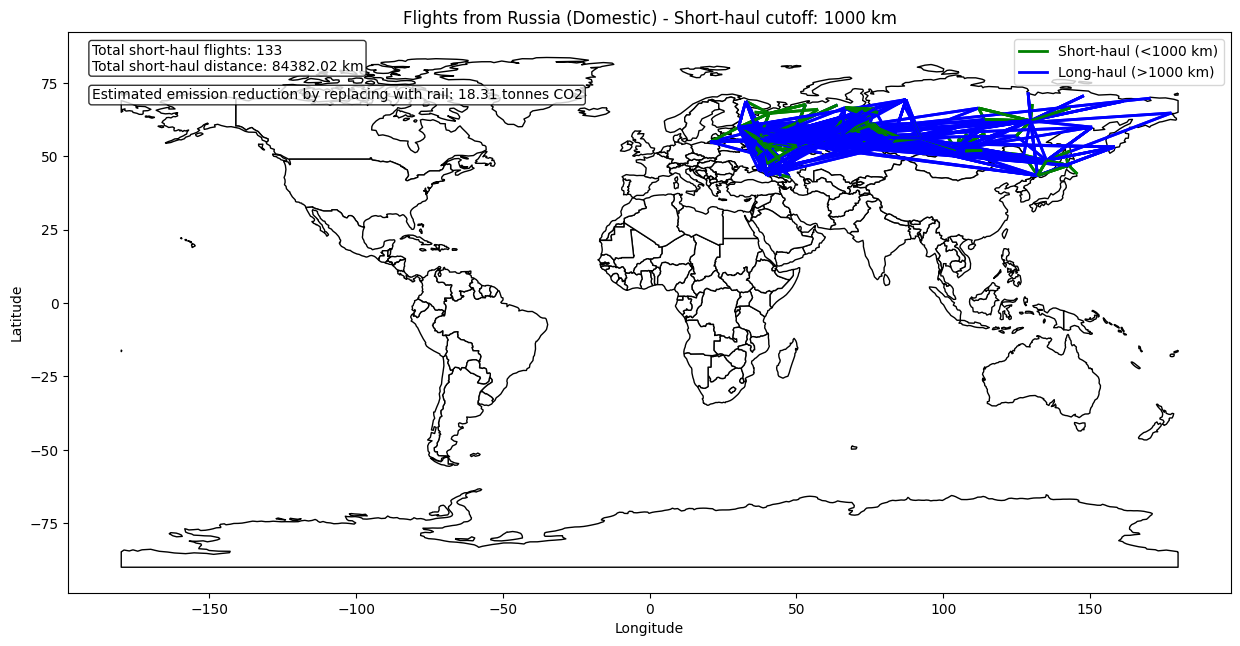

In [17]:
analyzer.plot_flights_from_country2("Russia", internal=True, short_haul_cutoff=1000)

# Overview of the FlightDataAnalyzer Class

The `FlightDataAnalyzer` class is a comprehensive tool designed for aviation data analysis. It offers a broad spectrum of functionalities to explore, analyze, and visualize aviation-related information. Below we discuss its design intentions, captivating features, and candid reflections on its limitations.

## Design Intentions
The class was created with the intent to:

- **Simplify Complex Data**: Transform intricate aviation datasets into accessible and actionable insights.
- **Facilitate Strategic Decisions**: Support the aviation industry in making data-driven decisions regarding routes, fleet management, and environmental impact.
- **Promote Research and Education**: Provide a valuable resource for academic research and educational purposes within the field of aviation.

## Why It Is Interesting

The class offers several interesting features:

- **Multifunctionality**: It serves multiple stakeholders across the aviation industry, from airline operators to policy makers and researchers.
- **Environmental Insights**: With a growing emphasis on sustainable practices, the ability to analyze and potentially reduce CO2 emissions is particularly relevant.
- **User-Centric**: It's designed to be intuitive, making complex aviation data easily understandable for users with varying degrees of technical expertise.
- **Adaptability**: The class is structured to be adaptable to the ever-evolving aviation industry, allowing for updates and expansions as new data becomes available.


## Potential Limitations

While the FlightDataAnalyzer class is a powerful tool, it is also important to recognize its limitations:

- **Data Dependency**: The accuracy and usefulness of the class's outputs are heavily dependent on the quality and currency of the underlying data.
- **Resource Intensity**: Complex data analysis and visualizations might require significant computational resources, potentially limiting use in low-resource environments.
- **Static Snapshots**: While providing valuable insights, the visualizations and analyses are static, representing a snapshot in time rather than real-time data.

In essence, the `FlightDataAnalyzer` class is a thoughtfully designed tool that harnesses the power of data to provide vital insights into the aviation industry. Its functionalities make it an exciting resource for many, though it must be used judiciously, considering its reliance on external data and the computational demands it may pose.


# Analysis

The aviation `FlightDataAnalyzer` class encapsulates a suite of methods that provides an in-depth look into various facets of aviation data. Below, we analyze the outputs of each method to showcase its utility and implications.

## Method: `calculate_distance_by_airport`

- **Description**: This method calculates the great-circle distance between two airports, offering essential data for route planning, fuel calculations, and flight time estimation.
- **Analysis**: By analyzing distances, airlines can optimize flight paths, potentially reducing fuel consumption and CO2 emissions. For instance, the calculated distance between Los Angeles International Airport and Singapore Changi Airport can inform about the viability of direct flights and the choice of aircraft based on range capabilities.

## Method: `plot_airport_in_country`

- **Description**: This visualization tool plots the location of airports within a given country, offering insights into the country's airport distribution and infrastructure.
- **Analysis**: The distribution of airports in Portugal, as visualized, can inform discussions on domestic connectivity and tourism strategy. The geographic spread of airports impacts national and international accessibility, affecting economic and developmental planning.

## Method: `plot_flights_from_airport`

- **Description**: This method visualizes flight routes from a specific airport, differentiating between international and domestic flights.
- **Analysis**: The routes from Quatro de Fevereiro Airport highlight Angola's connectivity to the world and internal regions. Such visualizations can be used to identify key hubs and potential opportunities for new routes, crucial for airport strategic development.

## Method: `plot_flights_from_country`

- **Description**: The method displays all flights originating from a country, categorizing them into domestic and international flights.
- **Analysis**: For instance, the visual outputs for France can indicate the central role of its airports in global aviation, and the domestic flight map can inform on the density of internal connectivity. It also highlights the potential for alternative travel methods, like high-speed trains, especially for dense short-haul flight networks.

## Method: `plot_most_used_airplane_models`

- **Description**: It ranks and visualizes the most used aircraft models within specified countries, offering insights into fleet composition and aircraft usage.
- **Analysis**: Understanding the prevalent aircraft models, as in Portugal, helps in understanding the operational patterns and economic decisions of airlines. It also informs on maintenance, training, and logistics requirements.

## Method: `distance_analysis`

- **Description**: This method analyzes the distribution of flight distances, offering a macroscopic view of flight length patterns.
- **Analysis**: The distribution informs on common flight distances, which can be pivotal for airline scheduling, aircraft selection, and market strategy, emphasizing on the importance of short-haul versus long-haul operations.

## Method: `plot_flights_from_country2` (with emissions insight)

- **Description**: This specialized method factors in the environmental impact, providing a visual and quantitative estimate of emissions that could be saved by replacing short-haul flights with alternative transport.
- **Analysis**: The analysis for Russia illustrates the environmental implications of short-haul flights and could influence policy decisions regarding sustainable transport solutions.y.
## Method: `airport_info`

- **Description**: This method offers a rich narrative detailing the functions, operations, and unique characteristics of individual airports. It includes information about infrastructure, strategic importance, and any specific considerations or protocols related to the airport in question.
- **Analysis**: Utilizing `airport_info` on Thule Air Base provides vital details such as its strategic military role in the Arctic, the necessity of specific accommodations due to extreme weather, and logistical considerations for personnel. This information is crucial for operational planning, military logistics, and supporting research operations in challenging environments.

## Method: `aircraft_info`

- **Description**: The `aircraft_info` method provides comprehensive specifications and operational details for various aircraft models. It includes data such as dimensions, capacity, range, speed, and service history which are pivotal for airlines and aviation professionals.
- **Analysis**: An example output for the Airbus A318 allows airlines to assess the suitability of this aircraft for short to medium-haul routes, given its seating capacity and range. The information can influence decisions on fleet management, route planning, and can assist in ensuring optimal aircraft utilization for specific market demands.
icaft_details)



# Finalizing the Flight Data Analysis

As we conclude our analysis, it's essential to ensure that our code is clean, maintainable, and well-documented. This step is crucial for any project as it prepares the code for sharing with others or for deployment in a production environment.

This notebook serves as a comprehensive report of our findings and can be used as a presentation of our analysis. It provides a narrative that walks through the data exploration, analysis, and visualization steps, culminating in the insights we have drawn from our flight data.

With this, our Flight Data Analysis is complete. We invite you to explore the notebook, review the visualizations, and consider the implications of our findings on the aviation industry.
